# Lektion 4: _Estimation Claims_ analysieren

In der letzten Lektion haben wir R genutzt, um Diagramme aus Datensätzen zu erstellen. Wir haben festgestellt, dass diese Diagramme uns bereits erlauben, Rückschlüsse über unsere Daten zu ziehen. In dieser Lektion lernen wir nun, wie wir diese Rückschlüsse statistisch berechnen können.

Wir fokussieren uns dabei zunächst nur auf *Estimation Claims*, also auf Aussagen, die behaupten, dass ein bestimmter Teil der Grundgesamtheit eine Bedingung (nicht) erfüllt. *Comparison* und *Relational Claims* behandeln wir in der kommenden Lektion.

#### Lernziele
In der ersten Lektion lernen Sie:
* Wie Sie Mittelwert, Median und Standardabweichung berechnen.
* Wie Sie Konfidenzintervalle berechnen und interpretieren.


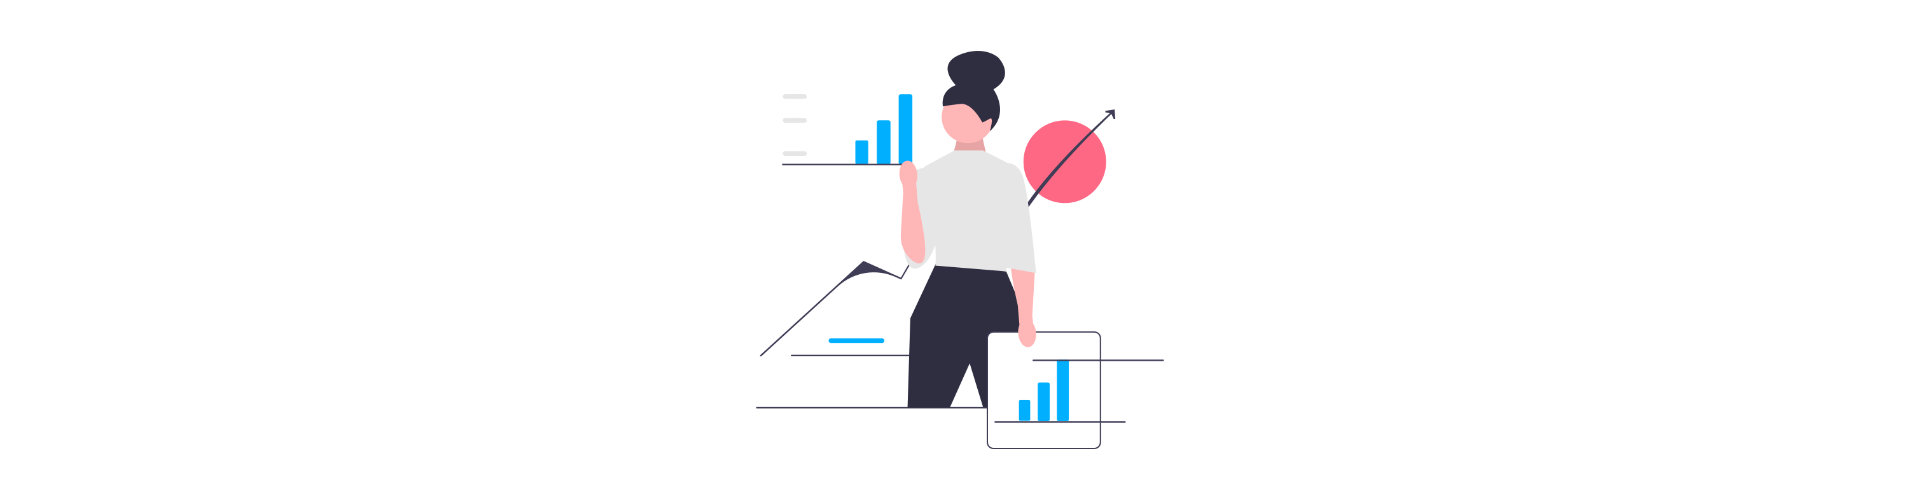

# Zusammenfassende Statistik

Unter Zusammenfassende Statistik (engl. _summary statistics_) versteht man (einfache) statistische Werkzeuge, die Daten zusammenfassen. Viele dieser Werkzeuge kennen Sie bereits aus dem Alltag.

## Beispiel: Die Temperatur in Düsseldorf 🏖

Als Beispiel dient uns eine Aufzeichnung der durchschnittlichen Tagestemperatur in Düsseldorf für das gesamte Jahr 2022.

Zunächst laden wir die CSV-Datei mit den Messwerten herunter, speichern ihre Werte in einem Dataframe und werfen einen kurzen Blick auf die Daten:

In [ ]:
download.file("https://github.com/paulHasselkuss/intro-to-r/raw/main/data/temp.csv", "temp.csv")
temp <- read.csv("temp.csv")
head(temp)

Die Messwerte für Düsseldorf sind also unter `temp$dus` verfügbar (`temp$mad` enthält analoge Messwerte für Madrid - dazu kommen wir später). Schauen wir uns die Temperaturen in Düsseldorf in einem Plot an:

In [ ]:
# Hier geben wir an, wie R die Datumsangabe lesen soll: Year-Month-Day
dates <- as.Date(temp$date, "%Y-%m-%d")
# Diesene Daten tragen wir dann auf die X-Ache auf
plot(dates, temp$dus)

## Extrempunkte: `min()` und `max()`

Über `min()` und `max()` können wir den kleinsten und den größten Wert ausgeben:

In [ ]:
min(temp$dus)

In [ ]:
max(temp$dus)

## Quantile: `quantile()`

Quantile unterteilen die sortierte Datenreihe in gleich große Klassen. Dabei spielt es keine Rolle, in wie viele Klassen man die Werte unterteilt.

Eine besondere Unterteilung ist die der **Quartile** (von lat. _quattuor_, vier), die die Werte in gleich große Viertel aufteilt. Sie kennen diese bereits aus der Kastengrafik aus der letzten Lektion.

Wir nutzen die Funktion `quantile()`:

In [ ]:
quantile(temp$dus)

An 25% aller Tage - d.h. an einem Viertel, dem ersten Quartil - war die Temperatur geringer als `7.3°C`; an 75% aller Tage - dem letzten Quartil - war die Temperatur höher als `18°C`.

## Mittelwert: `mean()`

Der Mittelwert (oder Durchschnitt) ist der Wert, der arithmetisch genau in der Mitte der gegebenen Zahlen liegt. Um den Mittelwert manuell zu berechnen, bilden wir die Summe der einzelnen Werte und teilen diese durch die Anzahl aller Werte; in R nutzen wir stattdessen die Funktion `mean()`:

In [ ]:
mean(temp$dus)

## Median: `median()`

Der Median (oder Zentralwert) ist der Wert, der tatsächlich in der Mitte der gegebenen Zahlen liegt, wenn wir diese nach Größe ordnen. Wir können diesen identifizieren, indem wir die Zahlen nach Größe sortieren und dann die Zahl finden, die tatsächlich in der Mitte der Reihe steht.

Nehmen wir die Zahlenfolge `1, 2, 4, 7, 40`. Der Median ist der Wert, der an der mittleren, also der 3. Stelle steht: `4`. Der Mittelwert wäre demgegenüber `10.8` (`(1+2+4+7+40)/5`). Das Beispiel zeigt auch die Stärke des Medians: Er ist immun gegenüber Ausreißern, d.h. einzelnen Werten, die deutlich von den anderen abweichen.

R stellt uns für die Berechnung des des Median die gleichnamigen Funktion `median()` zur Verfügung:

In [ ]:
median(temp$dus)

## Standardabweichung: `sd()`
Die Standardabweichung (_standard deviation_) hängt eng mit dem Mittelwert zusammen; sie gibt an, wie weit die Werte durchschnittlich vom Mittelwert entfernt sind. So ist die Standardabweichung ein Indikator für die "Breite" der Werte, die wir betrachten.

Die Standardabweichung wird in der gleichen Einheit wie die Werte angegeben, hier also in Grad Celsius. In R berechnen wir Sie mit der Funktion `sd()`:

In [ ]:
sd(temp$dus)

Diese Standardabweichung bedeutet, dass die über das Jahr gemessenen Temperaturen **im Durchschnitt** um 6,7°C vom Mittelwert (12,3°C) abweichen.

##Übersicht: `summary()`

Die Funktion `summary()` stellt die meisten der bisher besprochenen Werte gebündelt dar: Extremwerte, Quartile, Median und Mittelwert.

In [ ]:
summary(temp$dus)

# Konfidenzintervalle

Im Temperatur-Beispiel blicken wir tatsächlich auf alle Messwerte des Jahres; wir untersuchen also kein Sample, sondern die komplette Grundgesamtheit. In den meisten Fällen steht uns dieser Luxus nicht zur Verfügung und die besten Daten, die wir haben, stammen aus der Untersuchung eines repräsentativen Samples.

Damit haben wir aber ein neues Problem: Wie können wir sicher sein, dass der Mittelwert, den wir anhand unseres Samples errechnen, auch für die Grundgesamtheit gilt?

Wir können uns rückversichern, indem wir das Konfidenzintervall für unseren ermittelten Wert berechnen. Das Konfidenzintervall erlaubt uns einen Rückschluss darüber, mit welcher Sicherheit (mit welcher "Konfidenz") sich ein an einem Sample ermittelter Wert auf die Grundgesamtheit übertragen lassen.


## Beispiel: Mensastudie 🍕

Als Beispiel dient uns eine (fiktive) Studie über die Qualität unserer Mensa. In dieser Studie wurden 50 zufällig ausgewählten Studierenden gebeten, die folgenden zwei Fragen zu beantworten:
1. Waren Sie heute schon in der Mensa oder haben es fest vor? `Ja/Nein`
2. Wie zufrieden sind Sie mit der Qualität der Mensa? `1/2/3/4/5` (1=sehr unzufrieden, 5=sehr zufrieden)

Laden wir zunächst die erhobenen Daten, erstellen daraus einen Dataframe und werfen ein Blick darauf:

In [ ]:
download.file("https://github.com/paulHasselkuss/intro-to-r/raw/main/data/mensa.csv", "mensa.csv")
mensa <- read.csv("mensa.csv")
head(mensa)

## Konfidenzintervalle für Anteile

Schauen wir uns zunächst an, wie wir das Konfidenzintervall für den Anteil der Personen berechnen, die die Mensa besuchen. Schauen wir uns dafür die Daten einmal an:

In [ ]:
hist(mensa$visit, breaks=-0.5:1.5, labels=TRUE)

In unserer Stichprobe verhält es sich damit relativ eindeutig: von 50 Befragten haben 33 die Mensa am gleichen Tag besucht oder haben es vor - das sind rund 66%.

Lässt sich diese Beobachtung auch auf _alle_ Studierenden übertragen? Wenn wir erneut ein Sample von 50 Studierenden befragen, können wir schließlich davon ausgehen, dass die Zahlen etwas anders ausfallen (schlimmstenfalls sogar deutlich anders). Indem wir ein Konfidenzintervall für die Anzahl der Personen angeben, die die Mensa besucht haben, beugen wir dieser Gefahr vor.

Das Konfidenzintervall einer Wahrscheinlichkeit W% (das "Konfidenzniveau") gibt uns ein Intervall von zwei Werten A und B an, sodass die Wahrscheinlichkeit, dass wir bei erneuter Durchführung unseres Beobachtung einen Wert beobachten, der innerhalb dieses Intervalls A,B liegt, bei W% liegt.

Um ein Konfidenzintervall berechnen zu können, benötigen wir drei Angaben:
1. Die Größe des Sampels: In unserem Fall `50` weil wir 50 Studierende befragt haben;
2. Die Anzahl der statistischen Einheiten, die unsere Bedingung erfüllen: In unserem Fall `33`, weil 33 der Befragten angegeben haben, die Mensa besucht zu haben.
3. Das Konfidenzniveau (`conf.level`): Wir wählen zunächst `0.96`.

Nun können wir das Konfidenzintervall mit der Funktion `prop.test()` berechnen:



In [ ]:
prop.test(x=33, n=50, conf.level=0.96)

Das Konfidenzintervall wird in der 5. und 6. Zeile angegeben:
```
96 percent confidence interval:
 0.5047847 0.7885906
```
Sprich: Ein 96%iges Konfidenzintervall liegt zwischen (gerundet) `0.50` und `0.79`, d.h. zwischen 50% und 79%. Mit anderen Worten: Basierend auf unseren Daten können wir uns zu 96% sicher sein, dass zwischen 50% und 79% **aller** Studierenden die Mensa besuchen.

## Konfidenzintervalle für den Mittelwert

Das gleiche Prinzip können wir verwenden, wenn wir wissen möchten, ob sich der an einem Sample beobachtete Mittelwert auf die Grundgesamtheit übertragen lässt. Schauen wir uns dafür nun die Zufriedenheit an, die wir in unserer Studie festgestellt haben:

In [ ]:
hist(mensa$satisfaction, breaks=0.5:5.5, labels=TRUE)

Wie wir den Mittelwert aus diesen Werten berechnen, wissen wir bereits:

In [ ]:
mean(mensa$satisfaction)

Um auch hierfür ein Konfidenzintervall zu berechnen, nutzen wir die Funktion `t.test()` und übergeben als x-Argument den Vektor mit den beobachteten Werten:

In [ ]:
t.test(x=mensa$satisfaction, conf.level=0.96)

Schauen wir auch hier wieder auf die 5. und 6. Zeile. Ein 96%iges Konfidenzintervall liegt zwischen `2.83` und `3.48`, Mit anderen Worten: Basierend auf unseren Daten können wir uns zu 96% sicher sein, dass die tatsächliche durchschnittliche Zufriedenheit mit der Mensa zwischen `2.83` und `3.48` liegt - und damit so ziemlich in der Mitte der Werteskala.

## Wieso funktioniert das?

Das Verfahren wirkt zunächst ein wenig wie Magie: Wie können wir anhand der Untersuchung eines Samples etwas über die Wahrscheinlichkeit aussagen, ähnliche Werte auch in der Grundgesamtheit vorzufinden?

In der Berechnung des Konfidenzintervalls machen wir eine stillschweigende Annahme über die statistische Verteilung unserer Werte in der Grundgesamtheit: Wir gehen davon aus, dass sie ungefähr einer Normalverteilung folgen.

Vereinfacht gesagt bedeutet das, dass wir davon ausgehen, dass die meisten Erhebungseinheiten (die Dinge, die wir untersuchen) eine Merkmalsausprägung aufweisen, die nahe dem Mittelwert liegt. Je weiter eine Merkmalsausprägung vom Mittelwert entfernt ist, an umso weniger Erhebungseinheiten lässt sich diese Merkmalsausprägung beobachten

Diese Verteilung lässt sich auch grafisch darstellen:

In [ ]:
# Diesen Code müssen Sie nicht nachvollziehen.

# Falls Sie dennoch Interesse haben: curve() zeichnet die Kurve
# gemäß der FUnktion dnorm, die die Normalverteilung bezeichnet.
curve(dnorm, -3.5, 3.5, lwd=2, axes = FALSE, xlab = "", ylab = "")

# axis() zeichnet darunter die Acchse mit den entsprechenden Beschriftungen
axis(1, at = -3:3, labels = c("-3s", "-2s", "-1s", "mean", "1s", "2s", "3s"))

Natürlich genügt nicht jede Eigenschaft, die wir beobachten können, auch der Normalverteilung. Für solche Fälle gibt es neben der Normalverteilung noch eine Reihe anderer statistischer Modelle; diese werden wir aber nicht im Rahmen dieses Kurses besprechen.

# Aufgaben 🏅

**a) Verschaffen Sie sich durch `summary()` einen Überblick über die Temperaturen in Düsseldorf (`temp$dus`) und der in Madrid (`temp$mad`). Was stellen Sie fest und warum?**

In [ ]:
# Tragen Sie den Programmcode hier ein

In [ ]:
# Tragen Sie ggf. weiteren Programmcode hier ein

_Notieren Sie hier ihre Beobachtung, indem Sie doppelt auf diesen Text klicken._

**b) Berechnen Sie ein 96%iges Konfidenzintervall für den Anteil der Befragten, die die Mensa NICHT besuchen. Interpretieren Sie dann das Ergebnis.**

In [ ]:
# Tragen Sie den Programmcode hier ein

_Notieren Sie hier ihre Interpretation, indem Sie doppelt auf diesen Text klicken._

**c) Berechnen Sie ein 90%iges Konfidenzintervall für die Zufriedenheit mit der Mensa. Interpretieren Sie dann das Ergebnis.**

In [ ]:
# Tragen Sie den Programmcode hier ein


_Notieren Sie hier ihre Interpretation, indem Sie doppelt auf diesen Text klicken._